In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

import networkx as nx

from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.correction import RoomAreas

%matplotlib inline

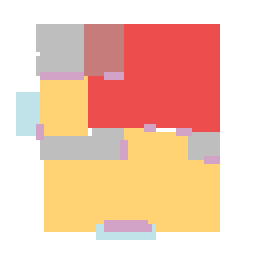

<PlanMasks 128021570610320>

In [3]:
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_01.pth"))
pm

In [4]:
# _room_to_find = NodeType.LIVING_ROOM
# room = [pm.masks[i] for i, n in enumerate(pm.graph.nodes) if n == _room_to_find ][0]

In [6]:
%% time
rooms = []
masks = []
for i, node in enumerate(pm.graph.nodes):
    if not NodeType.is_room(node):
        continue

    room = RoomAreas(node, pm.masks[i])
    rooms.append(room)
    masks.append(room.to_mask())

In [12]:
# (64, 64, R)
combined_mask = torch.stack(masks, dim=-1)

In [ ]:
combined_mask